# Tugas Besar Praktikum ML

dataset = `adult.csv` .

Dataset ini berasal dari sensus penduduk Amerika Serikat. Setiap baris mewakili seseorang dengan berbagai atribut seperti usia, tingkat pendidikan, pekerjaan, jam kerja, dan status pernikahan. Tujuannya adalah memprediksi apakah seseorang berpenghasilan lebih dari $50K per tahun atau tidak

Problem `Clasification`

In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.utils import resample  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## 1. PreProcessing

### - Importing Data

In [507]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [508]:
df.shape

(32561, 15)

### - Checking Column Types

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Tidak ada perubahan dalam data types

### - Check Duplicates

In [510]:
df.duplicated().sum()

np.int64(24)

Ada 25 data duplikat yang harus di hapus

In [511]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


### - Handling Missing Value

Nilai dari `workclass`, `occupation` dan `native.country` memiliki nilai ? yang merupakan ***missing value*** yang harus ditangani dengan mengubah nilainya dai '?' menjadi ***NaN***

In [513]:
df = df.replace('?', np.nan)

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [515]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [516]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\firman\AppData\Local\Temp\ipykernel_29380\344784494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


mengisi nilai **Missing Value** dengan nilai modus. Penggunaan **modus** untuk menangani *missing value* pada dataset ini adalah langkah paling rasional karena variabel yang terdampak (seperti `workclass` dan `native.country`) bertipe kategorikal, sehingga perhitungan matematis seperti rata-rata (*mean*) atau nilai tengah (*median*) mustahil dilakukan. Selain itu, mengingat distribusi data yang sangat timpang (*skewed*) di mana satu kategori mendominasi populasi (seperti mayoritas `United-States` atau sektor `Private`), mengisi data kosong dengan modus merupakan estimasi statistik yang paling aman dengan probabilitas kebenaran tertinggi. Pendekatan ini juga menjaga keutuhan volume data tanpa harus membuang informasi berharga pada kolom lain yang akan terjadi jika baris tersebut dihapus.

### - Handling outlier

In [517]:
num_cols = ['education.num']

# Fungsi hapus outlier IQR
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    return df_clean

df = remove_outliers_iqr(df, num_cols)
df.shape

(31344, 15)

Pada dataset Adult, outlier ditangani menggunakan metode IQR (Interquartile Range), yaitu dengan menghitung rentang antara kuartil 1 (Q1) dan kuartil 3 (Q3). Nilai yang berada di bawah batas Q1 − 1.5×IQR atau di atas Q3 + 1.5×IQR dianggap sebagai outlier dan dihapus dari dataset. Pendekatan ini membantu menjaga kualitas data agar model tidak bias terhadap nilai ekstrim.

### - Feature Engineer

#### Encode income

In [518]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

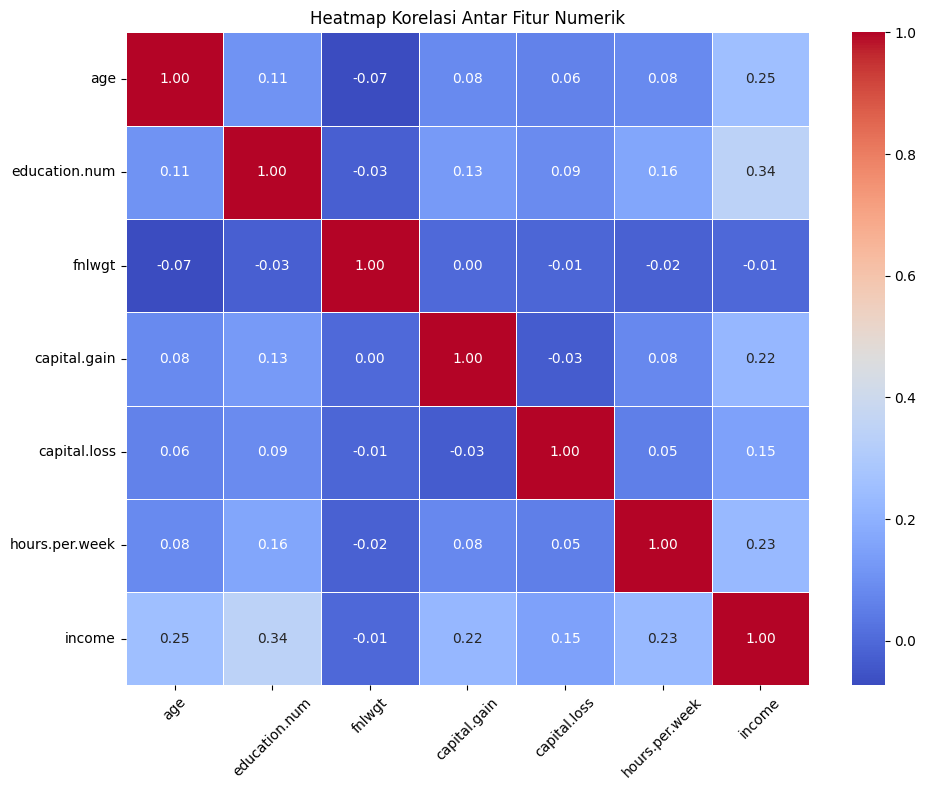

In [519]:
# Daftar kolom numerik (Adult Dataset)
num_cols = ['age','education.num','fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week','income']

# Hitung korelasi
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### - Drop Column

In [520]:
df.drop(['fnlwgt','education'], axis=1, inplace=True)

Columnn `education` dan `education.num` memiliki nilai yang sama namun nilai dari `education.num` adalah numerik yang lebih mudah di olah sehingga column `education` bisa di hapus. Untuk `fnlgwt` di drop karena tidak relevan dengan model

#### - Binerisasi Fitur Native Country
Kolom `native.country` diubah menjadi nilai biner, di mana `United-States` diberi nilai `1` dan seluruh negara lain diberi `0`. Tujuannya agar fitur kategorikal lebih mudah diproses oleh model machine learning.

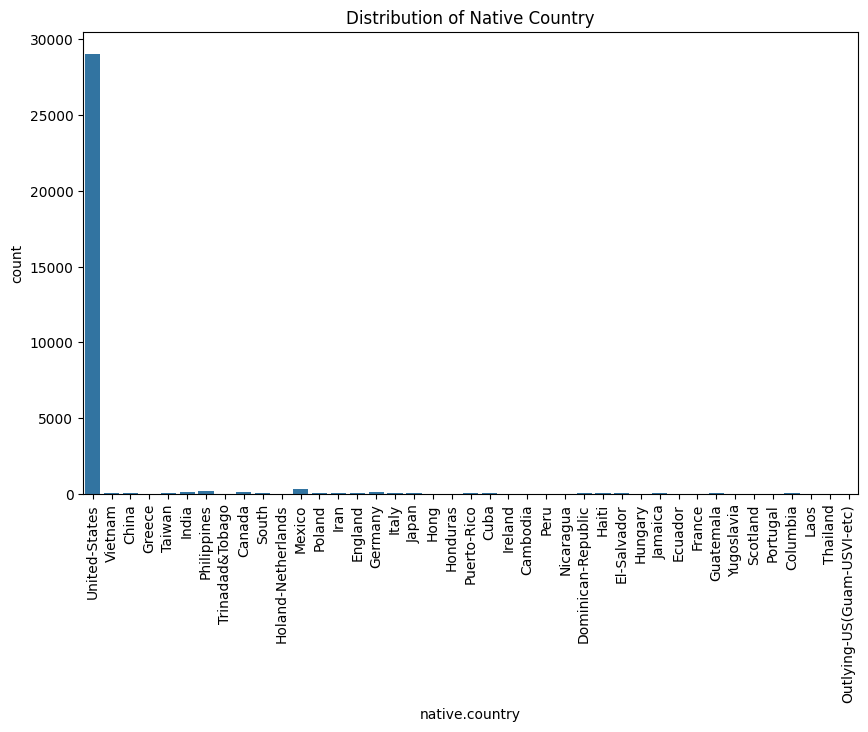

In [521]:
figure = plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='native.country')
plt.title('Distribution of Native Country')
plt.xticks(rotation=90)
plt.show()

In [522]:
df['native.country'] = df['native.country'].apply(lambda x: 1 if x == 'United-States' else 0)

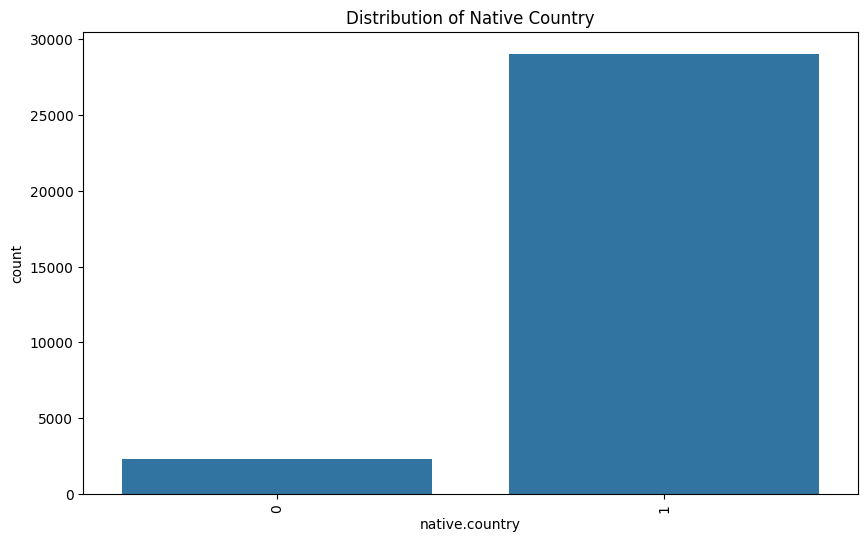

In [523]:
figure = plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='native.country')
plt.title('Distribution of Native Country')
plt.xticks(rotation=90)
plt.show()

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31344 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31344 non-null  int64 
 1   workclass       31344 non-null  object
 2   education.num   31344 non-null  int64 
 3   marital.status  31344 non-null  object
 4   occupation      31344 non-null  object
 5   relationship    31344 non-null  object
 6   race            31344 non-null  object
 7   sex             31344 non-null  object
 8   capital.gain    31344 non-null  int64 
 9   capital.loss    31344 non-null  int64 
 10  hours.per.week  31344 non-null  int64 
 11  native.country  31344 non-null  int64 
 12  income          31344 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 3.3+ MB


### - Encoding

In [525]:
cat_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
num_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 2. Hapus kolom bantuan EDA jika ada
cols_to_drop = ['age_group', 'work_type', 'has_capital_gain']
df_encoded = df_encoded.drop([c for c in cols_to_drop if c in df_encoded.columns], axis=1)

print("Shape setelah encoding:", df_encoded.shape)

Shape setelah encoding: (31344, 43)


### - Split Data

In [526]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split data 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Original X_train shape: {X_train.shape}")
print(f"Original X_test shape: {X_test.shape}")

Original X_train shape: (25075, 42)
Original X_test shape: (6269, 42)


### - Imbalance Problem

In [527]:
train_data = pd.concat([X_train, y_train], axis=1)
majority = train_data[train_data.income == 0]
minority = train_data[train_data.income == 1]

In [528]:
minority_upsampled = resample(minority,
                              replace=True, 
                              n_samples=len(majority),
                              random_state=42)

train_upsampled = pd.concat([majority, minority_upsampled])

# Pisahkan kembali ke X_train dan y_train
X_train = train_upsampled.drop('income', axis=1)
y_train = train_upsampled['income']

print("After Oversampling:")
print(y_train.value_counts())

After Oversampling:
income
0    18853
1    18853
Name: count, dtype: int64


Distribusi label menunjukkan ketidakseimbangan yang cukup besar: kelas `<=50K` jumlahnya jauh lebih banyak dibanding kelas `>50K`. Kondisi ini dapat menyebabkan model bias karena cenderung belajar lebih banyak dari kelas mayoritas. Teknik seperti oversampling, undersampling, atau class weighting diperlukan untuk menyeimbangkan data sebelum modeling.


### - Scaling

In [529]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Scaling selesai.")

Scaling selesai.


## 2. EDA

C:\Users\firman\AppData\Local\Temp\ipykernel_29380\3049080385.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='age_group', y='income', palette='viridis', ax=axes[0])
C:\Users\firman\AppData\Local\Temp\ipykernel_29380\3049080385.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='work_type', y='income', order=order_work, palette='coolwarm', ax=axes[1])
C:\Users\firman\AppData\Local\Temp\ipykernel_29380\3049080385.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='work_type', y='income', order=order_w

Text(0.5, 0, '')

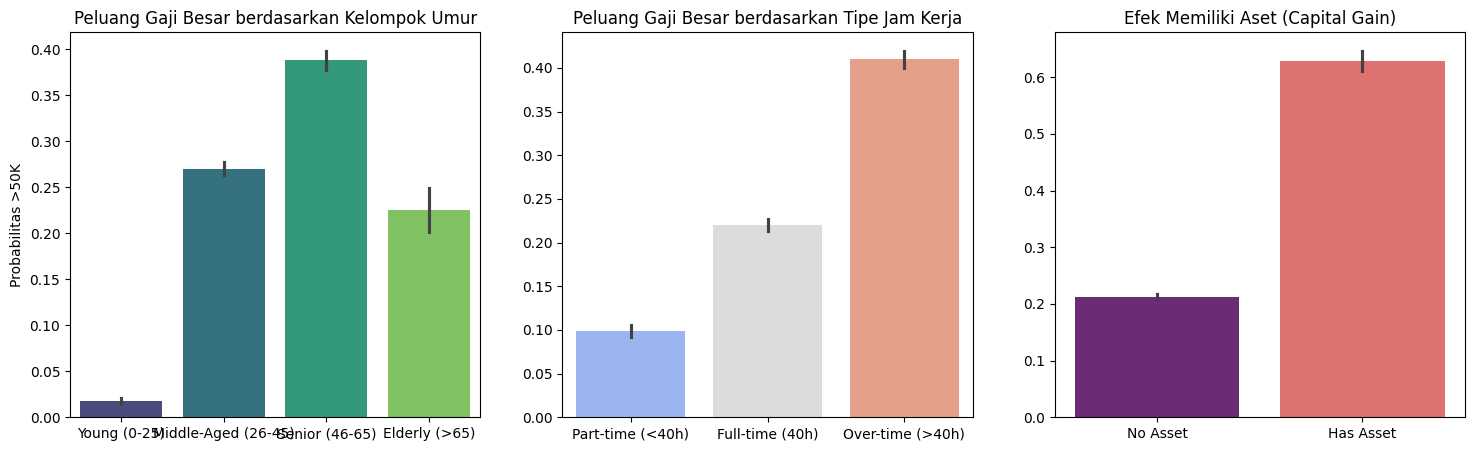

In [530]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# 1. Binning Age
bins_age = [0, 25, 45, 65, 100]
labels_age = ['Young (0-25)', 'Middle-Aged (26-45)', 'Senior (46-65)', 'Elderly (>65)']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)

# 2. Binning Hours per Week
def bin_hours(x):
    if x < 40: return 'Part-time (<40h)'
    elif x == 40: return 'Full-time (40h)'
    else: return 'Over-time (>40h)'
df['work_type'] = df['hours.per.week'].apply(bin_hours)

# 3. Binning Capital Gain
df['has_capital_gain'] = df['capital.gain'].apply(lambda x: 'Has Asset' if x > 0 else 'No Asset')

# EDA Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1: Age Group
sns.barplot(data=df, x='age_group', y='income', palette='viridis', ax=axes[0])
axes[0].set_title('Peluang Gaji Besar berdasarkan Kelompok Umur')
axes[0].set_ylabel('Probabilitas >50K')
axes[0].set_xlabel('')

# 2: Work Type
# Order: Part-time, Full-time, Over-time
order_work = ['Part-time (<40h)', 'Full-time (40h)', 'Over-time (>40h)']
sns.barplot(data=df, x='work_type', y='income', order=order_work, palette='coolwarm', ax=axes[1])
axes[1].set_title('Peluang Gaji Besar berdasarkan Tipe Jam Kerja')
axes[1].set_ylabel('')
axes[1].set_xlabel('')

# 3: Capital Gain Flag
sns.barplot(data=df, x='has_capital_gain', y='income', palette='magma', ax=axes[2])
axes[2].set_title('Efek Memiliki Aset (Capital Gain)')
axes[2].set_ylabel('')
axes[2].set_xlabel('')

C:\Users\firman\AppData\Local\Temp\ipykernel_29380\3724579882.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


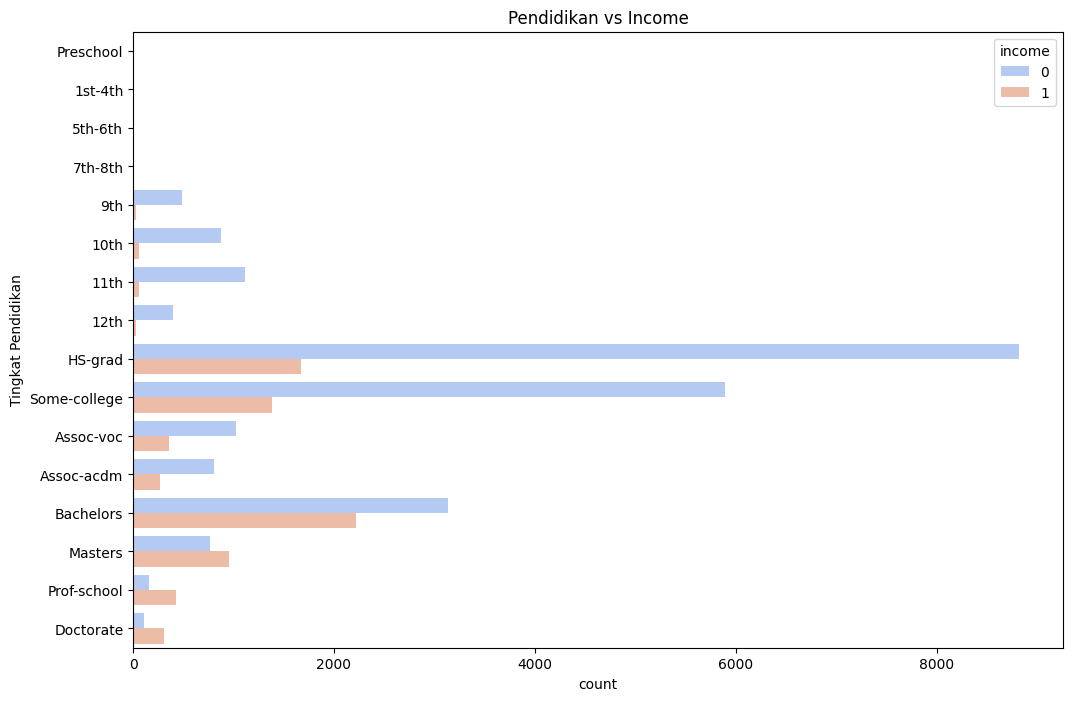

In [531]:
edu_map = {
    1: 'Preschool', 2: '1st-4th', 3: '5th-6th', 4: '7th-8th', 
    5: '9th', 6: '10th', 7: '11th', 8: '12th', 
    9: 'HS-grad', 10: 'Some-college', 11: 'Assoc-voc', 12: 'Assoc-acdm', 
    13: 'Bachelors', 14: 'Masters', 15: 'Prof-school', 16: 'Doctorate'
}

# 3. Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

# Urutkan berdasarkan angka (1 sampai 16)
sorted_nums = sorted(edu_map.keys()) # [1, 2, ..., 16]

# Plot menggunakan education.num
sns.countplot(data=df, y='education.num', hue='income', order=sorted_nums, palette='coolwarm', ax=ax)

# TRICK KUNCI: Ganti label angka menjadi teks kembali
# Kita ambil label teks dari kamus edu_map sesuai urutan sorted_nums
labels = [edu_map[x] for x in sorted_nums]
ax.set_yticklabels(labels)

ax.set_title('Pendidikan vs Income')
ax.set_ylabel('Tingkat Pendidikan')
plt.show()

## 3. Model

In [532]:
df_upsampled

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
29910,38,Private,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,1,1
31636,44,Federal-gov,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,1,1
1610,43,Private,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,1,1
19999,31,State-gov,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,1,1
19111,53,Private,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,0,0
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,1,0
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,1,0
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,1,0


### - Split Data

In [533]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split data 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Original X_train shape: {X_train.shape}")
print(f"Original X_test shape: {X_test.shape}")

Original X_train shape: (25075, 42)
Original X_test shape: (6269, 42)


### Logistic Regression

In [534]:
logmodel = LogisticRegression(max_iter=1000, random_state=42)
logmodel.fit(X_train, y_train)

# Prediksi
predictions_reg = logmodel.predict(X_test)

# Evaluasi
print("=== Logistic Regression Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, predictions_reg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_reg)) 

=== Logistic Regression Evaluation ===
Accuracy: 0.8544

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4714
           1       0.74      0.63      0.68      1555

    accuracy                           0.85      6269
   macro avg       0.81      0.78      0.79      6269
weighted avg       0.85      0.85      0.85      6269

Confusion Matrix:
[[4373  341]
 [ 572  983]]


c:\Users\firman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [535]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

predictions_tree = dtree.predict(X_test)

print("\n=== Decision Tree Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, predictions_tree):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions_tree))


=== Decision Tree Evaluation ===
Accuracy: 0.8170

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4714
           1       0.63      0.62      0.63      1555

    accuracy                           0.82      6269
   macro avg       0.75      0.75      0.75      6269
weighted avg       0.82      0.82      0.82      6269


Confusion Matrix:
[[4157  557]
 [ 590  965]]


### Random Forest

In [536]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Prediksi
predictions_rf = rf.predict(X_test)

# Evaluasi
print("=== Random Forest Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, predictions_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_rf))

=== Random Forest Evaluation ===
Accuracy: 0.8440

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4714
           1       0.71      0.62      0.66      1555

    accuracy                           0.84      6269
   macro avg       0.80      0.77      0.78      6269
weighted avg       0.84      0.84      0.84      6269

Confusion Matrix:
[[4329  385]
 [ 593  962]]


### XGBoost

In [537]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)

# Prediksi
pred_xgb = xgb.predict(X_test)

# Evaluasi
print("=== XGBoost Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, pred_xgb))

=== XGBoost Accuracy ===
Accuracy: 0.8767

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4714
           1       0.80      0.67      0.73      1555

    accuracy                           0.88      6269
   macro avg       0.85      0.81      0.82      6269
weighted avg       0.87      0.88      0.87      6269



## Hyper Parameter Tuning

In [538]:
def print_tuning_result(model_name, base_acc, tuned_acc, best_params):
    print(f"--- {model_name} ---")
    print(f"Base Accuracy : {base_acc:.4f}")
    print(f"Tuned Accuracy: {tuned_acc:.4f}")
    print(f"Improvement   : {((tuned_acc - base_acc) / base_acc) * 100:.2f}%")
    print(f"Best Params   : {best_params}\n")

### Logistic Regression

In [539]:
log_base = LogisticRegression(random_state=42, max_iter=1000)
log_base.fit(X_train, y_train)
base_acc_log = accuracy_score(y_test, log_base.predict(X_test))

param_grid_log = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # solver lbfgs support l2
    'solver': ['lbfgs', 'liblinear'] 
}


log_random = RandomizedSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000),
                                param_distributions=param_grid_log,
                                n_iter=10, cv=3, verbose=1, n_jobs=-1, scoring='accuracy', random_state=42)

log_random.fit(X_train, y_train)
results = pd.DataFrame(log_random.cv_results_)

display(results[[
    'params',
    'mean_test_score',
    'std_test_score',
    'split0_test_score',
    'split1_test_score',
    'split2_test_score'
]])

# Evaluasi
best_log = log_random.best_estimator_
tuned_acc_log = accuracy_score(y_test, best_log.predict(X_test))

print_tuning_result("Logistic Regression", base_acc_log, tuned_acc_log, log_random.best_params_)

c:\Users\firman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


,params,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}",0.843430,0.003672,0.846154,0.845896,0.838239
1,"{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}",0.844825,0.003339,0.848188,0.846016,0.840273
2,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.001}",0.829830,0.000890,0.830961,0.829744,0.828787
3,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}",0.844187,0.004060,0.848666,0.845059,0.838837
4,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ...",0.843310,0.003260,0.847709,0.842307,0.839914
5,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}",0.842632,0.001579,0.844838,0.841828,0.841230
6,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ...",0.805304,0.002571,0.804402,0.808806,0.802704
7,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ...",0.844347,0.003174,0.847829,0.845059,0.840153
8,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}",0.843868,0.003273,0.846872,0.845418,0.839316
9,"{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}",0.844347,0.003367,0.848068,0.845059,0.839914


--- Logistic Regression ---
Base Accuracy : 0.8544
Tuned Accuracy: 0.8520
Improvement   : -0.28%
Best Params   : {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}



### Decision Tree

In [540]:
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)
base_acc_dt = accuracy_score(y_test, dt_base.predict(X_test))

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=param_grid_dt,
                       cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

dt_grid.fit(X_train, y_train)

# Evaluasi
best_dt = dt_grid.best_estimator_
tuned_acc_dt = accuracy_score(y_test, best_dt.predict(X_test))

print_tuning_result("Decision Tree", base_acc_dt, tuned_acc_dt, dt_grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
--- Decision Tree ---
Base Accuracy : 0.8186
Tuned Accuracy: 0.8587
Improvement   : 4.89%
Best Params   : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

--- Decision Tree ---
Base Accuracy : 0.8186
Tuned Accuracy: 0.8587
Improvement   : 4.89%
Best Params   : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}



### Random Forest

In [541]:
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)
base_acc_rf = accuracy_score(y_test, rf_base.predict(X_test))

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

random_grid_rf = {
    'n_estimators': n_estimators,
    'max_features': ['sqrt', 'log2'], 
    'max_depth': max_depth,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=random_grid_rf,
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

rf_random.fit(X_train, y_train)

# Evaluasi
best_rf = rf_random.best_estimator_
tuned_acc_rf = accuracy_score(y_test, best_rf.predict(X_test))

print_tuning_result("Random Forest", base_acc_rf, tuned_acc_rf, rf_random.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
--- Random Forest ---
Base Accuracy : 0.8440
Tuned Accuracy: 0.8611
Improvement   : 2.02%
Best Params   : {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}

--- Random Forest ---
Base Accuracy : 0.8440
Tuned Accuracy: 0.8611
Improvement   : 2.02%
Best Params   : {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}



### XGBoost

In [542]:
xgb_base = XGBClassifier(random_state=42, n_jobs=-1)
xgb_base.fit(X_train, y_train)
base_acc_xgb = accuracy_score(y_test, xgb_base.predict(X_test))

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 6, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_random = RandomizedSearchCV(estimator=XGBClassifier(random_state=42, n_jobs=-1),
                                param_distributions=param_grid_xgb,
                                n_iter=30, cv=3, verbose=1, random_state=42, n_jobs=-1, scoring='accuracy')

xgb_random.fit(X_train, y_train)

# 4. Evaluasi
best_xgb = xgb_random.best_estimator_
tuned_acc_xgb = accuracy_score(y_test, best_xgb.predict(X_test))

print_tuning_result("XGBoost", base_acc_xgb, tuned_acc_xgb, xgb_random.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
--- XGBoost ---
Base Accuracy : 0.8713
Tuned Accuracy: 0.8746
Improvement   : 0.38%
Best Params   : {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}

--- XGBoost ---
Base Accuracy : 0.8713
Tuned Accuracy: 0.8746
Improvement   : 0.38%
Best Params   : {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}

